In [2]:
import shutil
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import PIL
import torch
import torchvision
from facenet_pytorch import MTCNN
from PIL import Image
from torchvision.utils import make_grid

In [3]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)
print("PIL version : ", PIL.__version__)

Platform: win32
Python version: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
---
torch version :  2.2.2+cpu
torchvision version :  0.17.2+cpu
PIL version :  10.2.0


In [4]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Using {device} device.")

Using cpu device.


In [5]:
MTCNN?

Init signature:
MTCNN(
    image_size=160,
    margin=0,
    min_face_size=20,
    thresholds=[0.6, 0.7, 0.7],
    factor=0.709,
    post_process=True,
    select_largest=True,
    selection_method=None,
    keep_all=False,
    device=None,
)
Docstring:     
MTCNN face detection module.

This class loads pretrained P-, R-, and O-nets and returns images cropped to include the face
only, given raw input images of one of the following types:
    - PIL image or list of PIL images
    - numpy.ndarray (uint8) representing either a single image (3D) or a batch of images (4D).
Cropped faces can optionally be saved to file
also.

Keyword Arguments:
    image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
    margin {int} -- Margin to add to bounding box, in terms of pixels in the final image. 
        Note that the application of the margin differs slightly from the davidsandberg/facenet
        repo, which applies the margin to the original image before r

In [6]:
mtcnn = MTCNN(device=device, keep_all=True, min_face_size=60, post_process=False)

print(mtcnn)

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

In [7]:
curr_work_dir = Path.cwd()

print(curr_work_dir)

d:\Projects\Celebrity Sightings in India


In [12]:
extracted_frames_dir = curr_work_dir/"Project4"/"data"/"extracted_frames"

print(extracted_frames_dir)

d:\Projects\Celebrity Sightings in India\Project4\data\extracted_frames


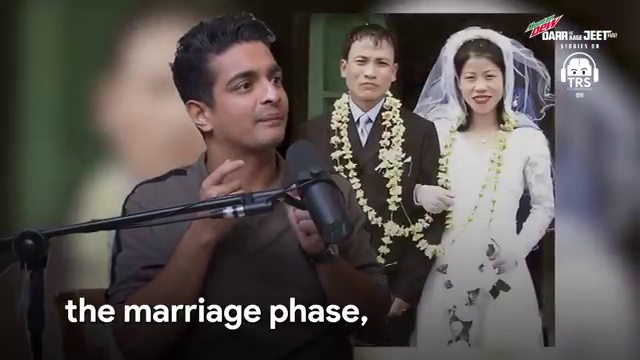

In [13]:
sample_image_filename = "frame_320.jpg"
sample_image_path = extracted_frames_dir/sample_image_filename

sample_image = Image.open(sample_image_path)
sample_image

In [14]:
boxes, probs = mtcnn.detect(sample_image)

print("boxes type:", type(boxes))
print("probs type:", type(probs))

boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>


In [15]:
print(boxes)
print(boxes.shape)

[[211.4107208251953 46.256752014160156 285.15838623046875
  146.47381591796875]
 [346.3168640136719 40.23664093017578 392.3766784667969 99.22237396240234]
 [458.0262756347656 55.83146667480469 502.13848876953125
  112.0572280883789]]
(3, 4)


In [16]:
number_of_detected_faces = len(boxes)

print(number_of_detected_faces)

3


In [17]:
num_faces = len(probs[probs > 0.99])

print(num_faces)


3


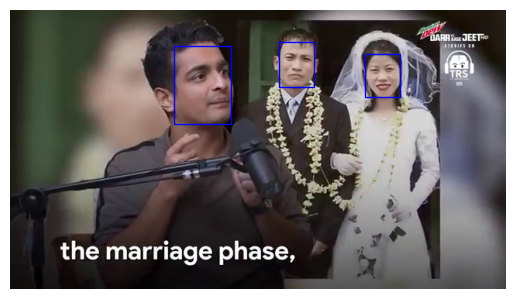

In [18]:
fig, ax = plt.subplots()
ax.imshow(sample_image)

for box in boxes:
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
plt.axis("off");

In [19]:

boxes, probs, landmarks = mtcnn.detect(sample_image, landmarks=True)

print("boxes type:", type(boxes))
print("probs type:", type(probs))
print("landmarks type:", type(landmarks))

boxes type: <class 'numpy.ndarray'>
probs type: <class 'numpy.ndarray'>
landmarks type: <class 'numpy.ndarray'>


In [20]:

print(landmarks.shape)

(3, 5, 2)


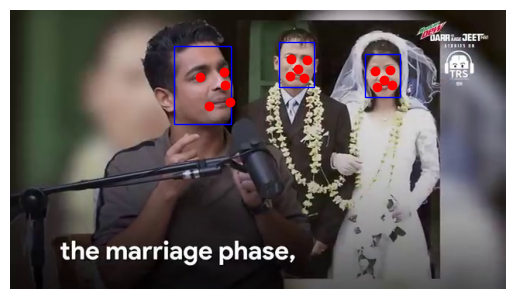

In [21]:

fig, ax = plt.subplots()
ax.imshow(sample_image)

for box, landmark in zip(boxes, landmarks):
    rect = plt.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="blue"
    )
    ax.add_patch(rect)
    for point in landmark:
        ax.plot(point[0], point[1], marker="o", color="red")
plt.axis("off");

In [22]:
faces = mtcnn(sample_image)

print(faces.shape)

torch.Size([3, 3, 160, 160])


In [23]:
Grid = make_grid(faces, nrow=3)

print(Grid.shape)

torch.Size([3, 164, 488])


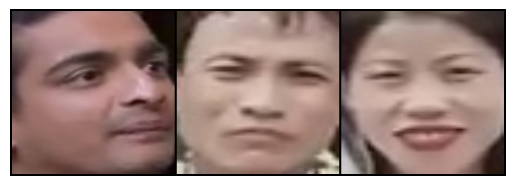

In [24]:
plt.imshow(Grid.permute(1, 2, 0).int())
plt.axis("off");

In [27]:
images_dir = curr_work_dir / "project4" / "data" / "images"
images_dir.mkdir(exist_ok=True)

In [28]:
mary_kom_dir = images_dir/ "mary_kom"
mary_kom_dir.mkdir(exist_ok=True)

In [29]:

mary_kom_imgs = [
    "frame_80.jpg",
    "frame_115.jpg",
    "frame_120.jpg",
    "frame_125.jpg",
    "frame_135.jpg",
]

In [30]:
mary_kom_img_paths = [extracted_frames_dir / i for i in mary_kom_imgs]

print("Number of images we'll use:", len(mary_kom_img_paths))

Number of images we'll use: 5


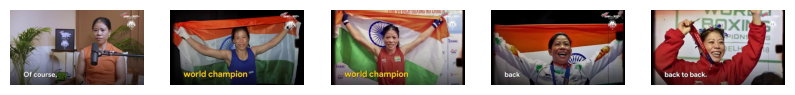

In [31]:
fig, axs = plt.subplots(1, 5, figsize=(10, 8))

for i, ax in enumerate(axs):
    ax.imshow(Image.open(mary_kom_img_paths[i]))
    ax.axis("off")

In [32]:
for image_path in mary_kom_img_paths:
    shutil.copy(image_path, mary_kom_dir)

In [33]:
print("Number of files in mary_kom directory:", len(list(mary_kom_dir.iterdir())))

Number of files in mary_kom directory: 5


In [34]:
ranveer_dir =  images_dir/ "ranveer"

In [35]:
ranveer_imgs = [
    "frame_10.jpg",
    "frame_40.jpg",
    "frame_270.jpg",
    "frame_365.jpg",
    "frame_425.jpg",
]

In [36]:
ranveer_img_paths = [extracted_frames_dir / i for i in ranveer_imgs]

print("Number of images we'll use:", len(ranveer_img_paths))

Number of images we'll use: 5


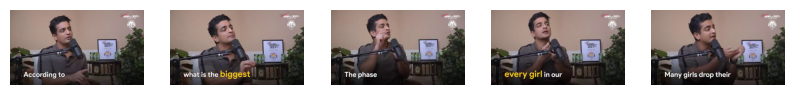

In [37]:
fig, axs = plt.subplots(1, 5, figsize=(10, 8))

for i, ax in enumerate(axs):
    ax.imshow(Image.open(ranveer_img_paths[i]))
    ax.axis("off")

In [46]:
ranveer_dir = images_dir/ "ranveer"
ranveer_dir.mkdir(exist_ok=True)

In [47]:
for image_path in ranveer_img_paths:
    shutil.copy(image_path, ranveer_dir)

print("Number of files in ranveer directory:", len(list(ranveer_dir.iterdir())))

Number of files in ranveer directory: 5
